> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#  I will analyze data to see Why patients miss their scheduled appointments with doctors? 
so i would like to answer these questions 
1. what percentage of patients who miss their scheduled appointments with doctors ?
2. Are males and females different in their showing up in the appointment or gender does not make any difference ?
3. Wether patient has alcoholism problem has effect on his showing up at the oppointment or not?
4. Wether patient has a scholarship or not has effect on his showing up at the oppointment? 
5. Is sending an sms message to remind patient of his appointment increase chance that he will be at the appointment?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
import seaborn as sb


In [3]:
import scipy.stats

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('KaggleV2-May-2016.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


We see that we have no missing values in any column but we
1. have label problem for this we need to change No-show to NoShow and then make all column names in lower case so that all         labels must be consistants
2. data type problem so we need to change data types
    1. ScheduledDay and AppointmentDay from object to DateTime 
    


Solving label problem 

In [7]:

df.rename(columns = lambda x :x.lower(), inplace = True)
df.rename(columns = {'no-show':'noshow'}, inplace = True)

In [7]:
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'noshow'],
      dtype='object')

* Solving data type problem 

In [8]:
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns]
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
noshow            110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [9]:
df[df.duplicated()].shape[0]

0

we see that we have no duplicate rows 

* we need to make sure that we have no null values

In [10]:
df.isnull().any().any()

False

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Now we solved all problems in data 
1. label problems
2. data type problems
3. we have no null values 
4. we have no duplicate rows

So we now ready to do EDA

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


we see that age have max value of 115.00 years we have to make further investigation to make sure that it's not an outlier

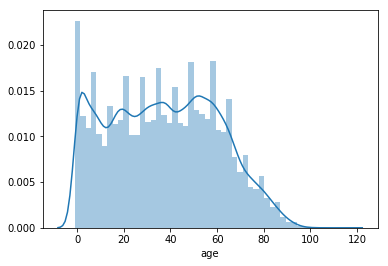

In [11]:
sb.distplot(df['age'])

So the distribution is skewed right so we will use IQR to see if we have outliers or not

In [12]:
agesummary = df.describe()['age']
first_quartile=agesummary['25%']
third_quartile=agesummary['75%']
IQR = third_quartile - first_quartile

upper_limit = third_quartile + 1.5*IQR

print('upper limit is ' + str(upper_limit))

upper limit is 110.5


So any value for age > 110.5 is an outlier and also any value for age column < 1 is considered an outlier as no person has age of 0

In [13]:
df = df[(df['age']<111) & (df['age']>=1)]

We need to make sure that we have no other outliers 

In [14]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.069820e+05,1.069820e+05,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000
mean,1.472801e+14,5.675434e+06,38.312501,0.101036,0.203773,0.074246,0.031407,0.022938,0.323269
std,2.558251e+14,7.133307e+04,22.460622,0.301377,0.402804,0.262172,0.174416,0.164010,0.467727
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173028e+12,5.640489e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.171698e+13,5.680742e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433627e+13,5.725635e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,102.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 what percentage of patients who miss their scheduled appointments with doctors ?

Text(0,0.5,'proportion')

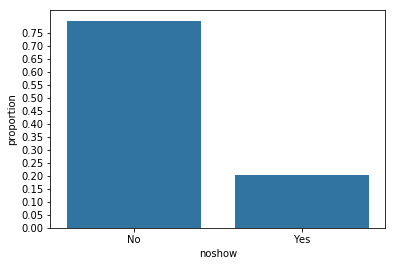

In [14]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
n_points = df.shape[0]
max_count = df['noshow'].value_counts().max()
max_prop = max_count / n_points

tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.yticks(tick_props * n_points, tick_names)
base_color = sb.color_palette()[0]
sb.countplot(data = df , x = 'noshow',color = base_color,)
plt.ylabel('proportion')

In [15]:
x = df.groupby('noshow')[['patientid']].count()
x/x.sum()

,patientid
noshow,
No,0.797377
Yes,0.202623


So we see that 20% of patient doesn't show up at their appointment 

### Research Question 2  Are males and females different in their showing up in the appointment or gender does not make any difference ?

In [16]:
def CHI_2_test(data ,feature):
    counts = pd.crosstab(data['noshow'],data[feature])
    column_sum = counts.sum(axis = 0)
    percentages = counts/column_sum
    print(percentages)
    
    print ('chi-square value, p value, expected counts')
    results = scipy.stats.chi2_contingency(counts)
    return results

In [17]:
def find_relation(data  , feature_name):
    assert type(feature_name) is str 
    sb.countplot(data =df , x = 'noshow',hue =feature_name )
    count = df.groupby([feature_name,'noshow'])[['patientid']].count()
    feature_sum = count.groupby(level =0).sum()
    return pd.DataFrame(count/feature_sum)

patientid
gender noshow           
F      No       0.796443
       Yes      0.203557
M      No       0.799154
       Yes      0.200846

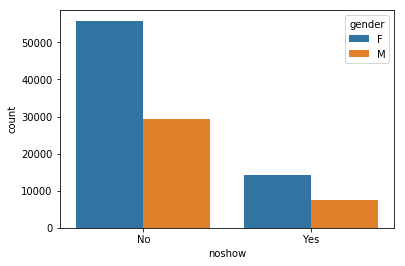

In [18]:
gender_relation_result = find_relation(df,'gender')
gender_relation_result

For male and female percentages of patiens who show up at their appointments are almost the same 
So we can not say that gender has effect on wether the patient will show up or not

We can see that the p-value is not small enough to reject null hypothesis so gender of the patient and his showing up at the appointment are independant so gender is not important feature if we would like to predict wether the patient will show up or not 

## The third research question,  Wether patient has alcoholism problem has effect on his showing up at the oppointment or not?

patientid
alcoholism noshow           
0          No       0.797340
           Yes      0.202660
1          No       0.798512
           Yes      0.201488

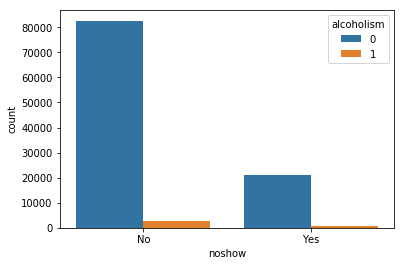

In [16]:
alcoholism_relation_result = find_relation(df,'alcoholism')
alcoholism_relation_result

In [17]:
df['alcoholism'].value_counts(normalize=True)

0    0.968593
1    0.031407
Name: alcoholism, dtype: float64

So wether the patient has an alchoholism problem or not does make almost no difference in chance of showing up at the appointment as percentages of patient with alcoholism and with no alcoholism  that show up at the appointment are 20.148810 and 20.194649 respectively  (almost the same)

## The forth research question,  Wether patient has a scholarship or not has effect on his showing up at the oppointment? 

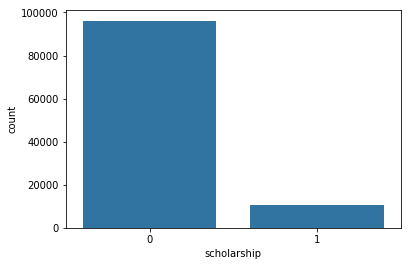

In [18]:
sb.countplot(data  = df ,x = 'scholarship', color = base_color)

patientid
scholarship noshow           
0           No       0.801337
            Yes      0.198663
1           No       0.762143
            Yes      0.237857

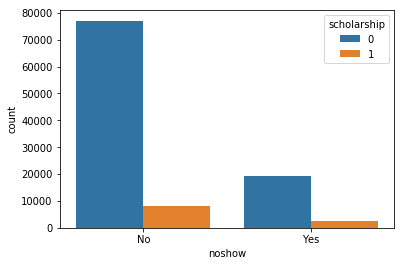

In [19]:
scholarship_relation_result = find_relation(df,'scholarship')
scholarship_relation_result

Just to make sure of the results

In [20]:
pd.DataFrame(df[df['scholarship']==0]['noshow'].value_counts(normalize=True))

,noshow
No,0.801337
Yes,0.198663


In [21]:
pd.DataFrame(df[df['scholarship']==1]['noshow'].value_counts(normalize=True))

,noshow
No,0.762143
Yes,0.237857


we see that patients with schoarship show up at their appointment less than patients has no scholarship

## The fifth research question , Is sending an sms message to remind patient of his appointment increase chance that he will be at the appointment?


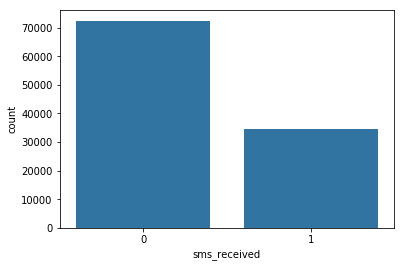

In [22]:
sb.countplot(data  = df ,x = 'sms_received', color = base_color)

In [23]:
df['sms_received'].value_counts(normalize=False)

0    72398
1    34584
Name: sms_received, dtype: int64

patientid
sms_received noshow           
0            No       0.832744
             Yes      0.167256
1            No       0.723340
             Yes      0.276660

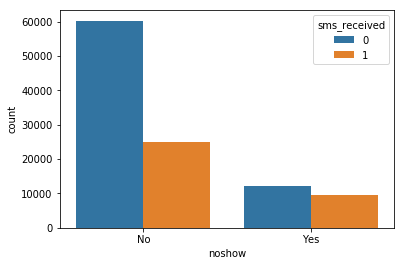

In [24]:
sms_relation_results = find_relation(df,'sms_received')
sms_relation_results

We can see that there is 72398 patients that haven't received sms 83% of them showed up at their appointments
and there 34584 patient patients that have received sms 72% of them showed up at their appointment and this is opposite of what is usually happen 

I want to check wether sending an sms to patient and his showing up at the appointment are related or not 
in other word is this big difference between patients who doesn't show up at their appointments between those were sent an sms and those who weren't is due to true differences in the population or just due to sampling variablility

In [28]:
sms_results = CHI_2_test('sms_received')
sms_results

sms_received         0        1
noshow                         
No            0.832744  0.72334
Yes           0.167256  0.27666
chi-square value, p value, expected counts
(1733.1391440428552, 0.0, 1, array([[ 57728.50937541,  27576.49062459],
       [ 14669.49062459,   7007.50937541]]))


So as p value is zero we can say that sending an sms to the patients and their showing up at the their appointments are dependant that sending an sms to the patient is an important feature to use if we would like to predict in future wether the patient will whoe up at his appointmnet or not  

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

## Summarization of findings
In this analysis we address the problem that signficant number of patient don't show up at their appointment with doctors and we try to address these questions
1. what percentage of patients who miss their scheduled appointments with doctors ?
2. Are males and females different in their showing up in the appointment or gender does not make any difference ?
3. Wether patient has alcoholism problem has effect on his showing up at the oppointment or not?
4. Wether patient has a scholarship or not has effect on his showing up at the oppointment? 
5. Is sending an sms message to remind patient of his appointment increase chance that he will be at the appointment?

Ffor that we use data consist of 110527 observations which is a good number of observation especially fot the small number of features it contains (14 features) 
The data we have doesn't suffer from null values or any dupicated observation but it suffer only from outliers but it doesn't affect our analysis in a great way becasue the percentage of these outliers is just 0.03 of the data
and we find that 
1. percentage of patient who don't show up at their appointment is 20% and for that we use counterplot as in cell 60 and cell 61 
2. There is no difference between percentage of male patients who don't show up at the appointment and female patients as in cell 62 and cell 63
3. There is no difference between percentage of patients with alcoholism who don't show up at the appointment and  patients without alcoholism as in cell 67
4. There is a slight difference on showing up at the appointment between those who have schoolarship 23.7% and those who don't 19.8%   as in cell 72
5. There is a difference between patients who were sent an sms and those who weren't 27.6% and those who weren't 16.7% and this is opposite to the usual case that sending an sms remind patients with there appointments and we can say that sending and sms to the patient and his showing up at 


In [20]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0